In [1]:
%run -m check_db database

File number mismatch: 3201 files in the index, 3107 files on disk
3107 unique files in the index, 3107 unique files on disk

database\data-nk\main\Hg\Inagaki.yml appears 3 times in the index
database\data-nk\main\SiO2\Malitson.yml appears 3 times in the index
database\data-nk\organic\C3H8O3 - glycerol\Gupta.yml appears 3 times in the index
database\data-nk\glass\schott\N-BK7.yml appears 3 times in the index
database\data-nk\glass\schott\N-BAF10.yml appears 3 times in the index
database\data-nk\main\Ag\Rakic-BB.yml appears 2 times in the index
database\data-nk\main\Al\Rakic-BB.yml appears 2 times in the index
database\data-nk\main\Au\Rakic-BB.yml appears 2 times in the index
database\data-nk\main\C\Phillip.yml appears 2 times in the index
database\data-nk\main\C\Taylor.yml appears 2 times in the index
database\data-nk\main\NaCl\Li.yml appears 2 times in the index
database\data-nk\main\Cu\Rakic-BB.yml appears 2 times in the index
database\data-nk\main\Fe\Johnson.yml appears 2 times in th

In [2]:
from ldbb import LDBB
from reflectance import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wavelength_min = 360  # nm
wavelength_max = 830  # nm
delta_wavelength = 1  # nm
incident_angle = 45   # degree

# Available options: 'Ag', 'Au', 'Cu', 'Al', 'Be', 'Cr', 'Ni', 'Pd', 'Pt', 'Ti', 'W'
material = 'Au'

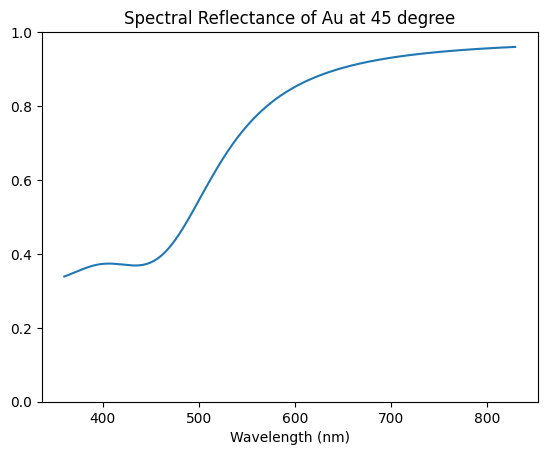

In [12]:
lambdas = np.arange(wavelength_min, wavelength_max, delta_wavelength)
idxAu = np.sqrt(LDBB(material,'LD', lambdas * 1e-9))
idxEnv = np.repeat(1, len(idxAu))
refl = spectral_reflectance(idxAu, idxEnv, incident_angle)

fig, ax = plt.subplots()
ax.set_title(f"Spectral Reflectance of {material} at {incident_angle} degree")
ax.set_xlabel("Wavelength (nm)")
ax.set_ylim(0, 1)
ax.plot(lambdas, refl)